# Projeto 1
Nome: Guilherme Lotaif
***
**Análise exploratória dos dados do World Bank**.

Esse projeto tem como objetivo estabelecer uma relação entre 3 bancos de dados diferentes obtidos pelo site: www.gapminder.org, através de uma pergunta. 
Bancos de dados levantados para análise:

- IDH (Índice de Desenvolvimento Humano);
- Consumo residencial de eletricidade (por pessoa);
- Usuários da internet (total).

### Pergunta norteadora:   Será que um país com um baixo índice de desenvolvimento humando tem um gasto residencial de eletricidade pequeno? Podendo assim limitar a quantidade de usuários na internet?

In [6]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

***
**Leitura dos arquivos:**

In [7]:
Energy_consumption = pd.read_excel('Indicator_Residential electricity consumption per person.xlsx')

Internet_users = pd.read_excel('Internet user total.xlsx')

HDI = pd.read_excel('hdi_human_development_index.xlsx')

***
**Seleção do ano analisado:**

In [8]:
Energy_consumption_2008 = Energy_consumption.loc[:, ["Residential electricity consumption, per person (kWh)", 2008]]

Internet_users_2008 = Internet_users.loc[:, ["Internet users, total number", 2008]]

HDI_2008 = HDI.loc[:, ["geo", 2008]]

***
**Mudança dos índices:**

In [9]:
Energy_consumption_2008_idx = Energy_consumption_2008.set_index('Residential electricity consumption, per person (kWh)')

Internet_users_2008_idx = Internet_users_2008.set_index('Internet users, total number')

HDI_2008_idx = HDI_2008.set_index('geo')

***
**Criação do Dataframe:**

In [43]:
df_2008 = Energy_consumption_2008_idx.join(Internet_users_2008_idx, how='inner', lsuffix='_Energy Consumption', rsuffix='_Internet users')

dataframe_2008 = df_2008.join(HDI_2008_idx, how='inner', lsuffix='HDI')

dataframe_2008.rename(columns={dataframe_2008.columns[2]:'2008_HDI'}, inplace=True)

dataframe_2008 = dataframe_2008.dropna()

dataframe_2008.head()

,2008_Energy Consumption,2008_Internet users,2008_HDI
Albania,636.341383,7.590813e+05,0.721
Algeria,590.509814,3.504773e+06,0.705
Angola,172.999227,8.297463e+05,0.480
Argentina,768.428300,1.116473e+07,0.794
Armenia,603.763058,1.912113e+05,0.725


***Observação:***
A tabela acima mostra que com o crescimento do IDH as outras variáveis tendem a crescer junto, porém com excessões e sem uma correlação implicita de imediato. é possivel perceber que paises com o IDh mais baixo tem um consumo de energia menos porém não tem necessariamente um numero pequeno de usuarios de internet.

## Correlação dos dados

In [38]:
correlacao_2008 = dataframe_2008.loc[:, ['2008_Energy Consumption','2008_Internet users','2008_HDI']].corr()
correlacao_2008.rename(columns={dataframe_2008.columns[0]:'Energy Comsumption'}, inplace=True)
correlacao_2008.rename(columns={dataframe_2008.columns[1]:'Internet Users'}, inplace=True)
correlacao_2008.rename(columns={dataframe_2008.columns[2]:'HDI'}, inplace=True)
correlacao_2008.head()

,Energy Comsumption,Internet Users,HDI
2008_Energy Consumption,1.000000,0.077523,0.555847
2008_Internet users,0.077523,1.000000,0.142537
2008_HDI,0.555847,0.142537,1.000000


**Observação:**
A partir da tabela acima é possivel assumir que existe uma correlação do IDH com o consumo de energia, apesar da mesma ser de média para pequena, ela ainda é maior do que a correlação entre os usuários de internet e o IDH

***
**Criação de gráficos para análise:**

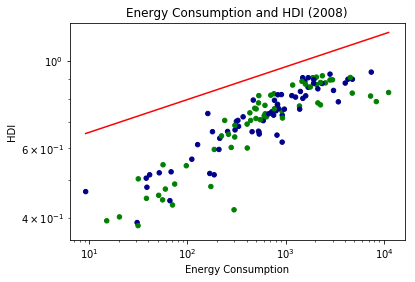

Correlação: 0.5558473607606391 



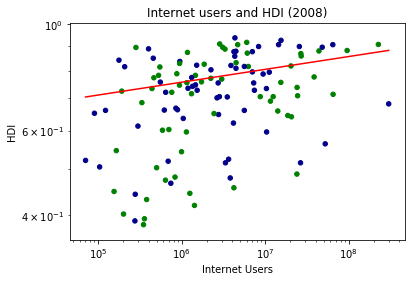

Correlação: 0.1425369281002745


In [46]:
#Gráfico de Consumo de energia pelo IDH
cov = dataframe_2008['2008_Energy Consumption'].cov(dataframe_2008['2008_HDI'])

var_X = dataframe_2008['2008_Energy Consumption'].var()
var_Y = dataframe_2008['2008_HDI'].var()

mX = dataframe_2008['2008_Energy Consumption'].mean()
mY = dataframe_2008['2008_HDI'].mean()

a = cov / var_X
b = mY - a*mX
dataframe_2008.plot.scatter(x='2008_Energy Consumption', y='2008_HDI',loglog=True, color=['green','darkblue'])

plt.plot((dataframe_2008['2008_Energy Consumption'].min(), dataframe_2008['2008_Energy Consumption'].max()), 
         (a*dataframe_2008['2008_Energy Consumption'].min() + b, a*dataframe_2008['2008_Energy Consumption'].max() + b), color='red')
plt.title('Energy Consumption and HDI (2008)')
plt.xlabel('Energy Consumption')
plt.ylabel('HDI');
plt.show()
print("Correlação:",dataframe_2008['2008_Energy Consumption'].corr(dataframe_2008['2008_HDI']),'\n')
#---------------------------------------------------------------------------------------------------------------------

#Gráfico de Usuarios de internet por IDH 
cov = dataframe_2008['2008_Internet users'].cov(dataframe_2008['2008_HDI'])

var_X = dataframe_2008['2008_Internet users'].var()
var_Y = dataframe_2008['2008_HDI'].var()

mX = dataframe_2008['2008_Internet users'].mean()
mY = dataframe_2008['2008_HDI'].mean()

a = cov / var_X
b = mY - a*mX
dataframe_2008.plot.scatter(x='2008_Internet users', y='2008_HDI',loglog=True, color=['green','darkblue'])

plt.plot((dataframe_2008['2008_Internet users'].min(), dataframe_2008['2008_Internet users'].max()), 
         (a*dataframe_2008['2008_Internet users'].min() + b, a*dataframe_2008['2008_Internet users'].max() + b), color='red')

plt.title('Internet users and HDI (2008)')
plt.xlabel('Internet Users')
plt.ylabel('HDI');
plt.show()
print("Correlação:",dataframe_2008['2008_Internet users'].corr(dataframe_2008['2008_HDI']))

***Observação:***
Apesar do primeiro gráfico estar com a linha de tendencia da correlação fora da parte mais concentrada do gráfico, ela é mais relacionada com o IDH das  duas plotadas acima, que possibilita afirmar que o consumo de enrgia esta mais ligado ao IDH do que os usários de internet

### Comparação:

**Seleção de outros anos e trocando os índices:**

In [32]:
#1997
Energy_consumption_1997 = Energy_consumption.loc[:, ["Residential electricity consumption, per person (kWh)", 1997]]
Internet_users_1997 = Internet_users.loc[:, ["Internet users, total number", 1997]]
HDI_1997 = HDI.loc[:, ["geo", 1997]]
#Mudança de índice
Energy_consumption_1997_idx = Energy_consumption_1997.set_index('Residential electricity consumption, per person (kWh)')
Internet_users_1997_idx = Internet_users_1997.set_index('Internet users, total number')
HDI_1997_idx = HDI_1997.set_index('geo')
#Criação do dataframe de 1997
df_1997 = Energy_consumption_1997_idx.join(Internet_users_1997_idx, how='inner', lsuffix='_Energy Consumption', rsuffix='_Internet users')
dataframe_1997 = df_1997.join(HDI_1997_idx, how='inner', lsuffix='HDI')
dataframe_1997.rename(columns={dataframe_1997.columns[2]:'1997_HDI'}, inplace=True)
dataframe_1997 = dataframe_1997.dropna()
#---------------------------------------------------------------------------------------------------------------------

#1999
Energy_consumption_1999 = Energy_consumption.loc[:, ["Residential electricity consumption, per person (kWh)", 1999]]
Internet_users_1999 = Internet_users.loc[:, ["Internet users, total number", 1999]]
HDI_1999 = HDI.loc[:, ["geo", 1999]]
#Mudança de índice
Energy_consumption_1999_idx = Energy_consumption_1999.set_index('Residential electricity consumption, per person (kWh)')
Internet_users_1999_idx = Internet_users_1999.set_index('Internet users, total number')
HDI_1999_idx = HDI_1999.set_index('geo')
#Criação do dataframe de 1999
df_1999 = Energy_consumption_1999_idx.join(Internet_users_1999_idx, how='inner', lsuffix='_Energy Consumption', rsuffix='_Internet users')
dataframe_1999 = df_1999.join(HDI_1999_idx, how='inner', lsuffix='HDI')
dataframe_1999.rename(columns={dataframe_1999.columns[2]:'1999_HDI'}, inplace=True)
dataframe_1999 = dataframe_1999.dropna()
#---------------------------------------------------------------------------------------------------------------------

#2004
Energy_consumption_2004 = Energy_consumption.loc[:, ["Residential electricity consumption, per person (kWh)", 2004]]
Internet_users_2004 = Internet_users.loc[:, ["Internet users, total number", 2004]]
HDI_2004 = HDI.loc[:, ["geo", 2004]]
#Mudança de índice
Energy_consumption_2004_idx = Energy_consumption_2004.set_index('Residential electricity consumption, per person (kWh)')
Internet_users_2004_idx = Internet_users_2004.set_index('Internet users, total number')
HDI_2004_idx = HDI_2004.set_index('geo')
#Criação do dataframe de 2004
df_2004 = Energy_consumption_2004_idx.join(Internet_users_2004_idx, how='inner', lsuffix='_Energy Consumption', rsuffix='_Internet users')
dataframe_2004 = df_2004.join(HDI_2004_idx, how='inner', lsuffix='HDI')
dataframe_2004.rename(columns={dataframe_2004.columns[2]:'2004_HDI'}, inplace=True)
dataframe_2004 = dataframe_2004.dropna()

In [33]:
#Correlação em 1997
Correlacao_Energy_1997 = dataframe_1997['1997_Energy Consumption'].corr(dataframe_1997['1997_HDI'])
Correlacao_Internet_1997 = dataframe_1997['1997_Internet users'].corr(dataframe_1997['1997_HDI'])

#Correlação em 1999
Correlacao_Energy_1999 = dataframe_1999['1999_Energy Consumption'].corr(dataframe_1999['1999_HDI'])
Correlacao_Internet_1999 = dataframe_1999['1999_Internet users'].corr(dataframe_1999['1999_HDI'])

#Correlação em 2004
Correlacao_Energy_2004 = dataframe_2004['2004_Energy Consumption'].corr(dataframe_2004['2004_HDI'])
Correlacao_Internet_2004 = dataframe_2004['2004_Internet users'].corr(dataframe_2004['2004_HDI'])

#Correlação em 2008
Correlacao_Energy_2008 = dataframe_2008['2008_Energy Consumption'].corr(dataframe_2008['2008_HDI'])
Correlacao_Internet_2008 = dataframe_2008['2008_Internet users'].corr(dataframe_2008['2008_HDI'])

Text(0.5,1,'Correlation Between energy comsumption and HDI')

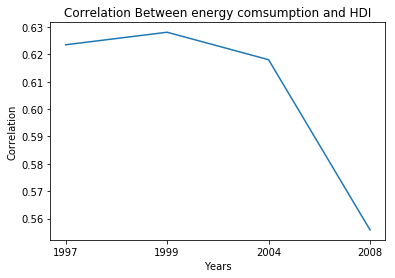

In [37]:
#Definindo a Correlação para plotar
Hist_Energy = [Correlacao_Energy_1997, Correlacao_Energy_1999, Correlacao_Energy_2004, Correlacao_Energy_2008]
#definindo os anos analisados
Years = ('1997', '1999', '2004', '2008')
y_pos = np.arange(len(Years))
#Plotando o gráfico
plt.plot(y_pos, Hist_Energy)
plt.xticks(y_pos, Years)
plt.xlabel('Years')
plt.ylabel('Correlation')
plt.title('Correlation Between energy comsumption and HDI')

Text(0.5,1,'Correlation Between Internet Users and HDI')

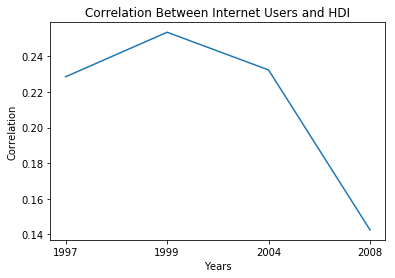

In [36]:
#Definindo a Correlação para plotar
Hist_Internet = [Correlacao_Internet_1997, Correlacao_Internet_1999, Correlacao_Internet_2004, Correlacao_Internet_2008]
#definindo os anos analisados
Years = ('1997', '1999', '2004', '2008')
y_pos = np.arange(len(Years))
#Plotando o gráfico
plt.plot(y_pos, Hist_Internet)
plt.xticks(y_pos, Years)
plt.xlabel('Years')
plt.ylabel('Correlation')
plt.title('Correlation Between Internet Users and HDI')

### Conclusão:
Hoje os indices de correlação dos três bancos de dados analisádos para determinados anos, estao menores, uma vez que, com o pregresso da globalização e com o baretamento de equipamentos que antes ficavam mais inacessiveis a quantidade de usuarios de internet estao crescendo cada vez mais. Ja qdo analisamos só o consumo de enrgia e o IDh ainda ha mais relacao porque a eletricidade ainda nao esta disponivel igualmente para todos os lugares, mas estab melhor do que ha alguns anos. 